In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from collections import Counter 

In [7]:
pokemon = pd.read_csv("../Data/300k.csv", low_memory=False, usecols=columns)

In [8]:
pokemon

,latitude,longitude,appearedLocalTime,appearedHour,appearedDay,city,temperature,population_density,class
0,20.525745,-97.460829,2016-09-08T03:57:45,5,8,Mexico_City,25.5,2431.23410,16
1,20.523695,-97.461167,2016-09-08T03:57:37,5,8,Mexico_City,25.5,2431.23410,133
2,38.903590,-77.199780,2016-09-08T03:57:25,5,8,New_York,24.2,761.88560,16
3,47.665903,-122.312561,2016-09-08T03:56:22,5,8,Los_Angeles,15.6,4842.16260,13
4,47.666454,-122.311628,2016-09-08T03:56:08,5,8,Los_Angeles,15.6,4842.16260,133
...,...,...,...,...,...,...,...,...,...
296016,39.119052,-76.633194,2016-09-02T21:50:11,23,2,New_York,25.0,1265.79160,19
296017,47.142237,7.244752,2016-09-02T21:50:08,23,2,Zurich,15.6,1886.21220,13
296018,42.258532,-87.881248,2016-09-02T21:50:07,23,2,Chicago,21.5,475.51624,16
296019,26.230929,-98.194772,2016-09-02T21:50:07,23,2,Chicago,36.7,849.44226,19


In [4]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [5]:
columns = ['latitude', 'longitude', 'appearedLocalTime', 'appearedHour',
           'appearedDay', 'city', 'temperature', 'population_density', 'class']

In [9]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296021 entries, 0 to 296020
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   latitude            296021 non-null  float64
 1   longitude           296021 non-null  float64
 2   appearedLocalTime   296021 non-null  object 
 3   appearedHour        296021 non-null  int64  
 4   appearedDay         296021 non-null  int64  
 5   city                296021 non-null  object 
 6   temperature         296021 non-null  float64
 7   population_density  296021 non-null  float64
 8   class               296021 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 20.3+ MB


In [12]:
uniq_cls = Counter(pokemon['class'])
len(uniq_cls)

144

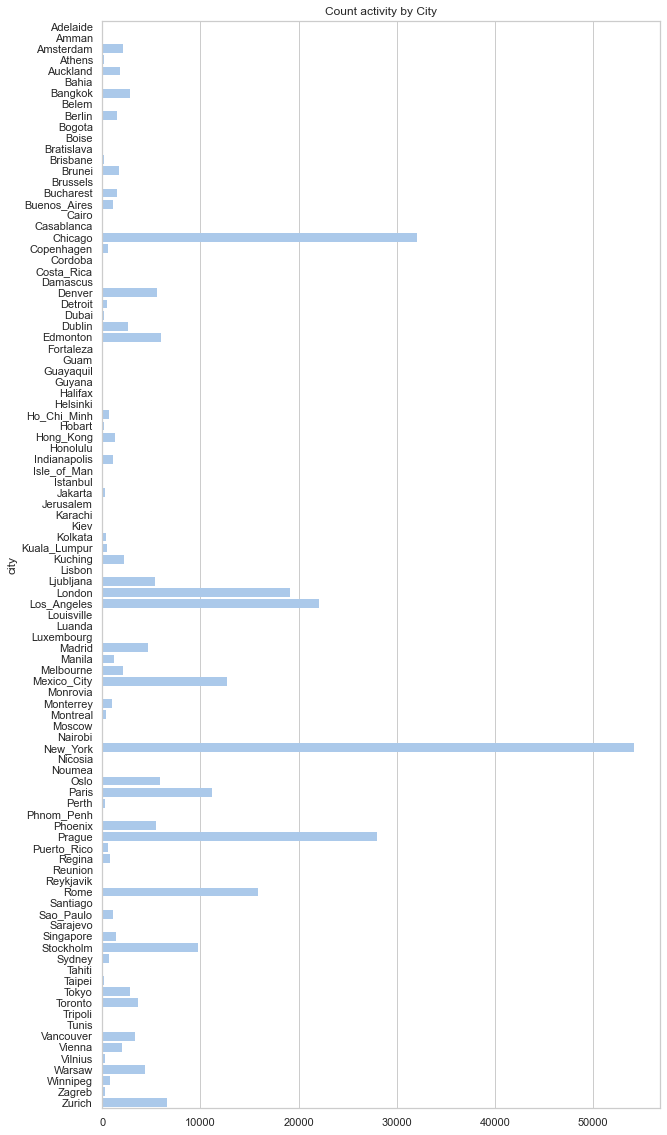

In [23]:
cnt = pokemon.groupby('city')['city'].size()
f, ax = plt.subplots(figsize=(10, 20)) 
sns.barplot(x=cnt.values, y=cnt.index, color='b', ax=ax)
plt.setp(ax.patches, linewidth=0)
texts = ax.set(title="Count activity by City")

Extract feature local time

In [14]:
pokemon['LocalTime'] =pokemon.appearedLocalTime.apply(lambda x: x.split("T")[1])

Group by time 

In [15]:
loc_time = pokemon.groupby(['city', pokemon.LocalTime.map(lambda x: int(x.split(":") [0]))]).size()
loc_time = loc_time.unstack()
loc_time.fillna(0, inplace=True)

Plot grouping data 

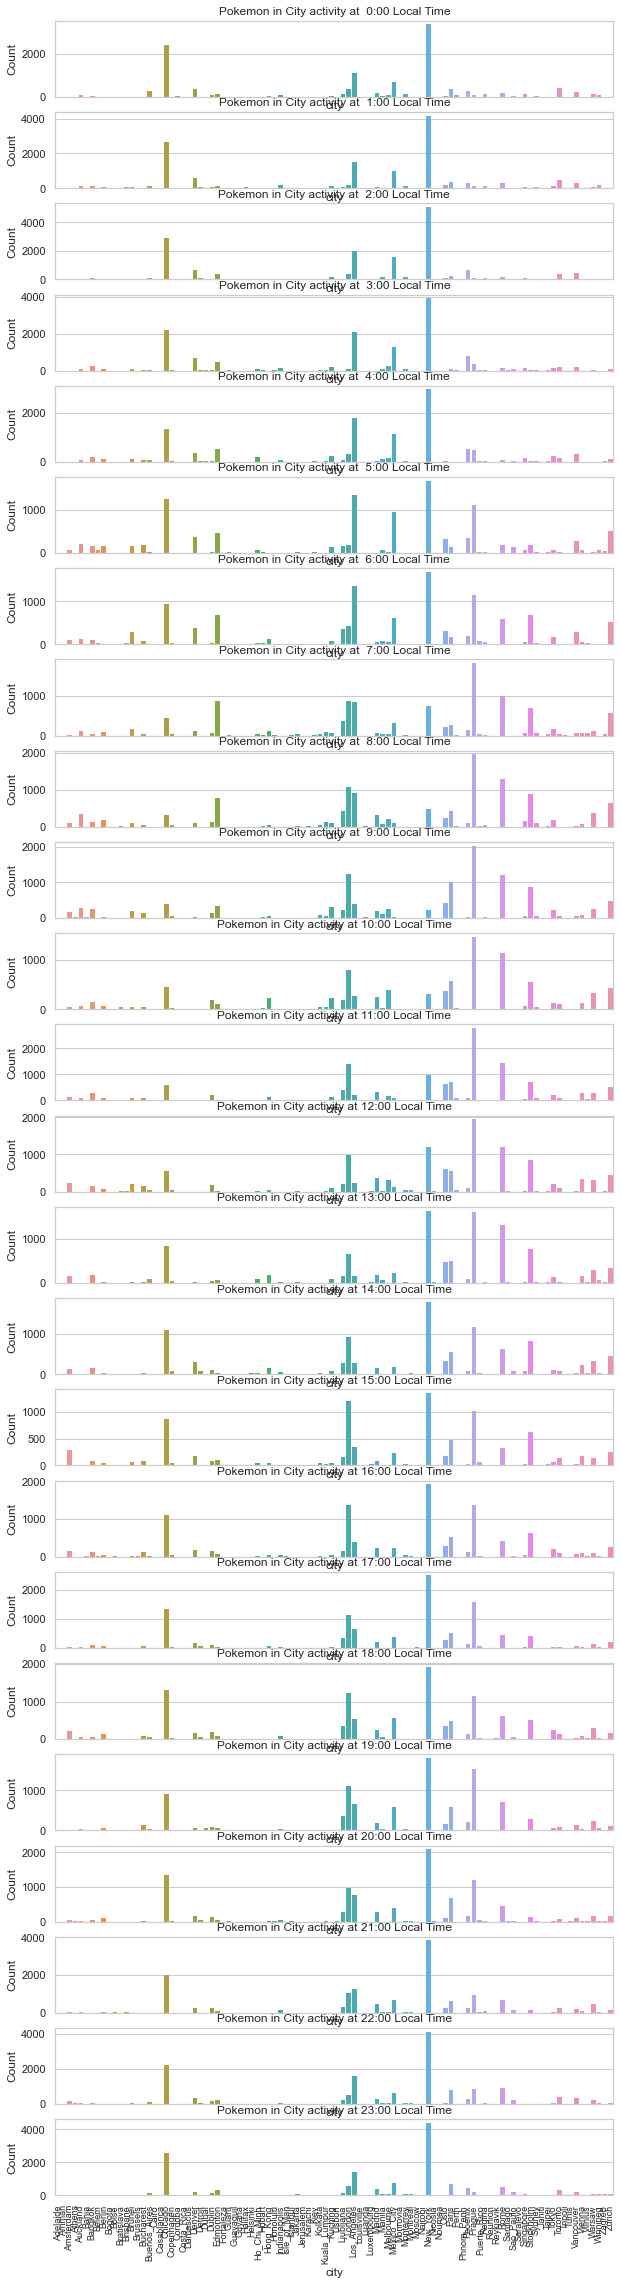

In [18]:
f, axes = plt.subplots(len(loc_time.columns), 1, figsize=(10, 40), sharex=True)
for i in range(len(loc_time.columns)):
    sns.barplot(x=loc_time.index, y=loc_time[i], ax=axes[i])
    axes[i].set(ylabel="Count", title="Pokemon in City activity at %2d:00 Local Time" %(i))
    plt.setp(axes[i].patches, linewidth=0)
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=9)

<AxesSubplot:>

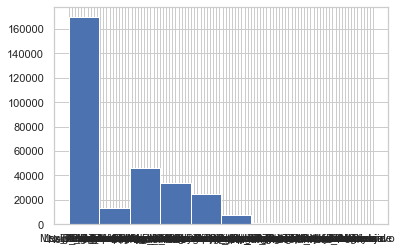

In [24]:
pokemon.city.hist()